In [1]:
# !pip install catboost

In [2]:
#import basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dice_ml
import warnings
import time

warnings.filterwarnings("ignore") 
pd.options.display.max_rows = 500

/home/btech/nityanand.mathur/anaconda3/envs/pytorch/lib/python3.10/site-packages/dice_ml/utils/exception.py:12: UserWarning: UserConfigValidationException will be deprecated from dice_ml.utils. Please import UserConfigValidationException from raiutils.exceptions.
  warnings.warn("UserConfigValidationException will be deprecated from dice_ml.utils. "


# Exploratory Data Analysis
## 1. Getting the data

In [3]:
winter_data = pd.read_csv(
    'TotalClothingValue.csv', index_col=0)


In [4]:
winter_data.shape

(2038, 19)

In [5]:
winter_data.head()

,DAY,School,SchoolType,StartTime,AvgMaxDailyTemp,AvgMinDailyTemp,AvgIndoorRelativeHumidity,IndoorTempDuringSurvey,Grade,Age,Gender,FormalClothing,TotalCLOwithChair,SwC,TSV,TPV,TCV,TSL,MC
Sno,,,,,,,,,,,,,,,,,,,
1,1,1,0,3,22.2,5.1,55.1,14.5,3,8,0,0,1.57,1,-1,2,2,1,2
2,1,1,0,3,22.2,5.1,55.1,14.5,3,8,0,0,1.21,1,-1,2,3,1,2
3,1,1,0,3,22.2,5.1,55.1,14.5,3,8,0,0,1.21,2,0,1,2,3,4
4,1,1,0,3,22.2,5.1,55.1,14.5,3,10,0,0,1.43,2,0,0,2,2,4
5,1,1,0,3,22.2,5.1,55.1,14.5,3,9,0,0,1.21,2,0,1,2,2,2


In [6]:
winter_data.describe()

,DAY,School,SchoolType,StartTime,AvgMaxDailyTemp,AvgMinDailyTemp,AvgIndoorRelativeHumidity,IndoorTempDuringSurvey,Grade,Age,Gender,FormalClothing,TotalCLOwithChair,SwC,TSV,TPV,TCV,TSL,MC
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000
mean,2.732581,2.709519,0.733562,2.299313,21.217076,6.254809,61.204711,14.496075,3.947007,9.524043,0.524043,0.606477,1.396045,1.965653,-0.326300,0.693817,2.119235,1.996075,3.572620
std,1.309543,1.285857,0.442204,1.252473,1.744861,1.715494,7.081575,1.203274,0.797110,1.049188,0.499544,0.488651,0.216997,0.301848,0.612427,0.691821,0.766258,0.822478,1.014077
min,1.000000,1.000000,0.000000,1.000000,17.600000,4.200000,44.230000,12.800000,3.000000,6.000000,0.000000,0.000000,0.900000,1.000000,-2.000000,-1.000000,-3.000000,-2.000000,1.000000
25%,2.000000,1.000000,0.000000,1.000000,20.500000,5.000000,58.200000,13.600000,3.000000,9.000000,0.000000,0.000000,1.210000,2.000000,-1.000000,0.000000,2.000000,2.000000,4.000000
50%,3.000000,3.000000,1.000000,2.000000,21.200000,5.600000,60.600000,14.100000,4.000000,10.000000,1.000000,1.000000,1.410000,2.000000,0.000000,1.000000,2.000000,2.000000,4.000000
75%,4.000000,4.000000,1.000000,3.000000,22.400000,6.600000,65.400000,15.100000,5.000000,10.000000,1.000000,1.000000,1.550000,2.000000,0.000000,1.000000,3.000000,2.000000,4.000000
max,5.000000,5.000000,1.000000,6.000000,24.200000,10.100000,75.600000,17.500000,5.000000,13.000000,1.000000,1.000000,2.040000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000


In [7]:
winter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 2038
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DAY                        2038 non-null   int64  
 1   School                     2038 non-null   int64  
 2   SchoolType                 2038 non-null   int64  
 3   StartTime                  2038 non-null   int64  
 4   AvgMaxDailyTemp            2038 non-null   float64
 5   AvgMinDailyTemp            2038 non-null   float64
 6   AvgIndoorRelativeHumidity  2038 non-null   float64
 7   IndoorTempDuringSurvey     2038 non-null   float64
 8   Grade                      2038 non-null   int64  
 9   Age                        2038 non-null   int64  
 10  Gender                     2038 non-null   int64  
 11  FormalClothing             2038 non-null   int64  
 12  TotalCLOwithChair          2038 non-null   float64
 13  SwC                        2038 non-null   int64

In [8]:
winter_data.columns

Index(['DAY', 'School', 'SchoolType', 'StartTime', 'AvgMaxDailyTemp',
       'AvgMinDailyTemp', 'AvgIndoorRelativeHumidity',
       'IndoorTempDuringSurvey', 'Grade', 'Age', 'Gender', 'FormalClothing',
       'TotalCLOwithChair', 'SwC', 'TSV', 'TPV', 'TCV', 'TSL', 'MC'],
      dtype='object')

In [9]:
winter_data = winter_data.astype({
    'DAY':'category',
    'School':'category',
    'SchoolType': 'category',
    'StartTime': 'category',
    'Grade': 'category',
    'Gender': 'category',
    'FormalClothing': 'bool',
    'TSV':'category',
    'TPV':'category',
    'TCV':'category',
    'TSL':'category',
    'MC':'category',
    'SwC':'category',
})

In [10]:
winter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 2038
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   DAY                        2038 non-null   category
 1   School                     2038 non-null   category
 2   SchoolType                 2038 non-null   category
 3   StartTime                  2038 non-null   category
 4   AvgMaxDailyTemp            2038 non-null   float64 
 5   AvgMinDailyTemp            2038 non-null   float64 
 6   AvgIndoorRelativeHumidity  2038 non-null   float64 
 7   IndoorTempDuringSurvey     2038 non-null   float64 
 8   Grade                      2038 non-null   category
 9   Age                        2038 non-null   int64   
 10  Gender                     2038 non-null   category
 11  FormalClothing             2038 non-null   bool    
 12  TotalCLOwithChair          2038 non-null   float64 
 13  SwC                        2038 n

## Distributions of Numerical Features

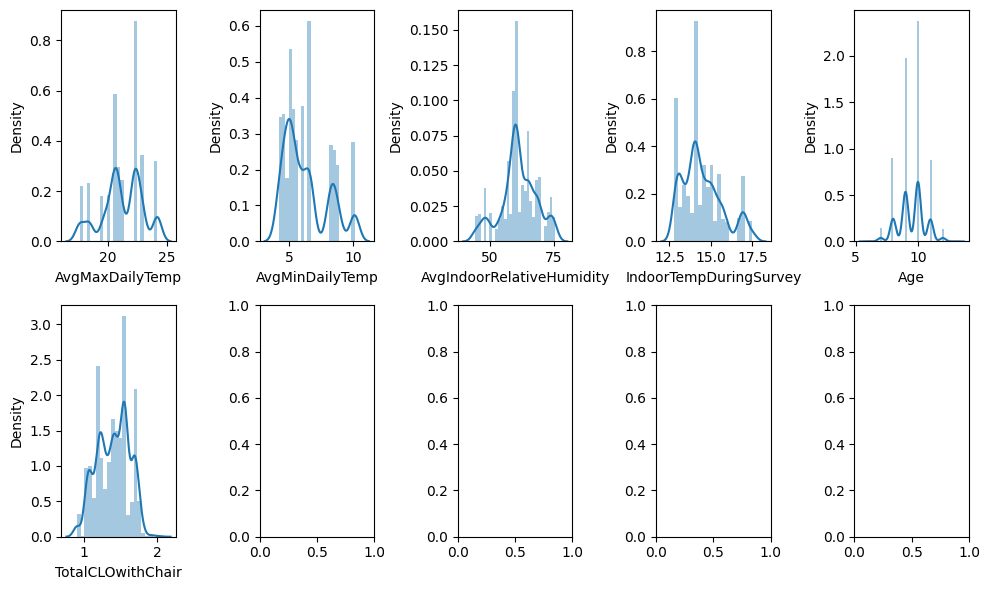

In [11]:
# create a new dataframe with columns containing only the numerical features
num_features = winter_data.select_dtypes(exclude=['bool', 'category']).copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
for i in range(len(num_features.columns)):
    plt.subplot(2, 5, i+1)
    sns.distplot(num_features.iloc[:,i].dropna())
    plt.xlabel(num_features.columns[i])

plt.tight_layout()
plt.show()

## Distributions of Categorical Features

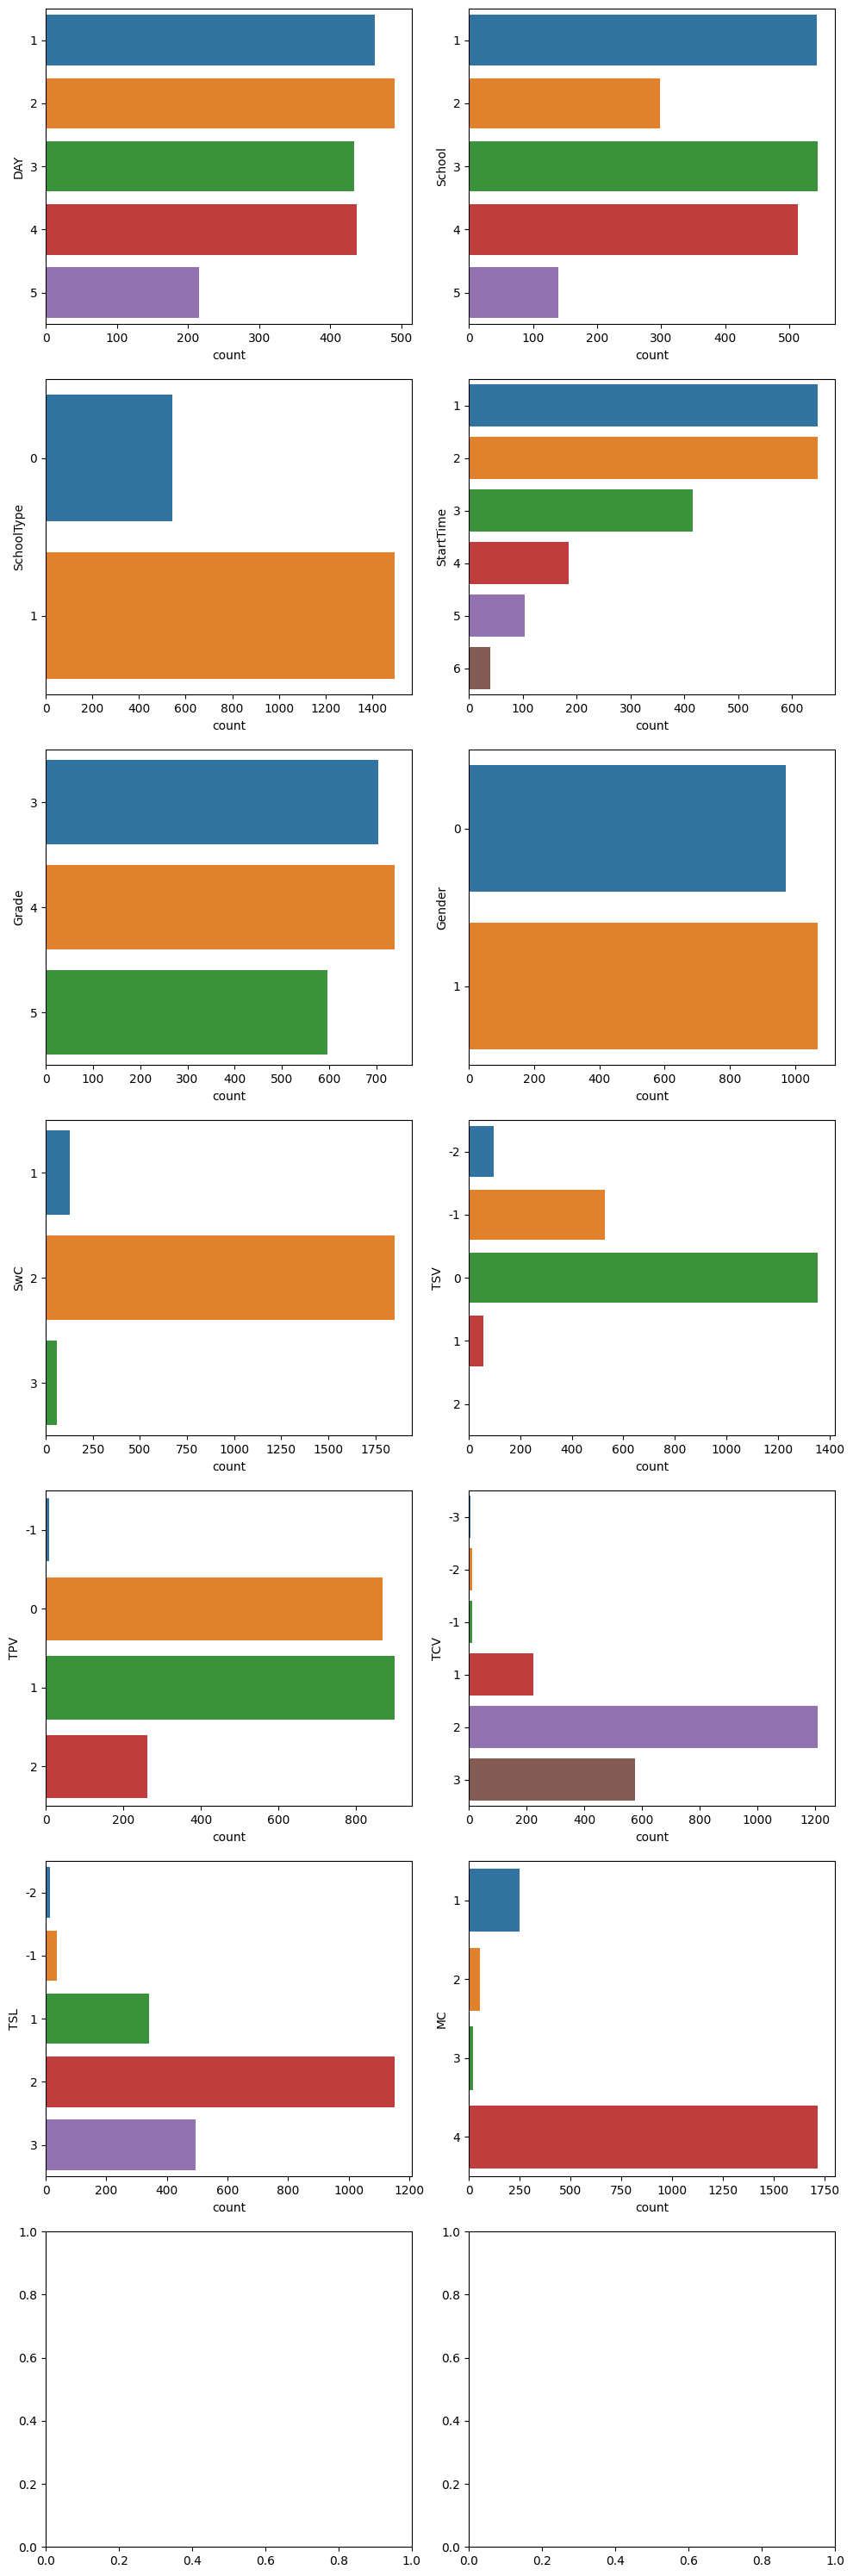

In [12]:
# create a new dataframe with columns containing only the categorical features
cat_features = winter_data.select_dtypes(include=['category']).copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 30))
plt.subplots_adjust(right=1.5, top=1.25)

for i in range(len(cat_features.columns)):
    plt.subplot(7, 2, i+1)
    sns.countplot(y=cat_features.columns[i], data=cat_features)
    
plt.tight_layout()
plt.show()

## Distributions of Boolean Features

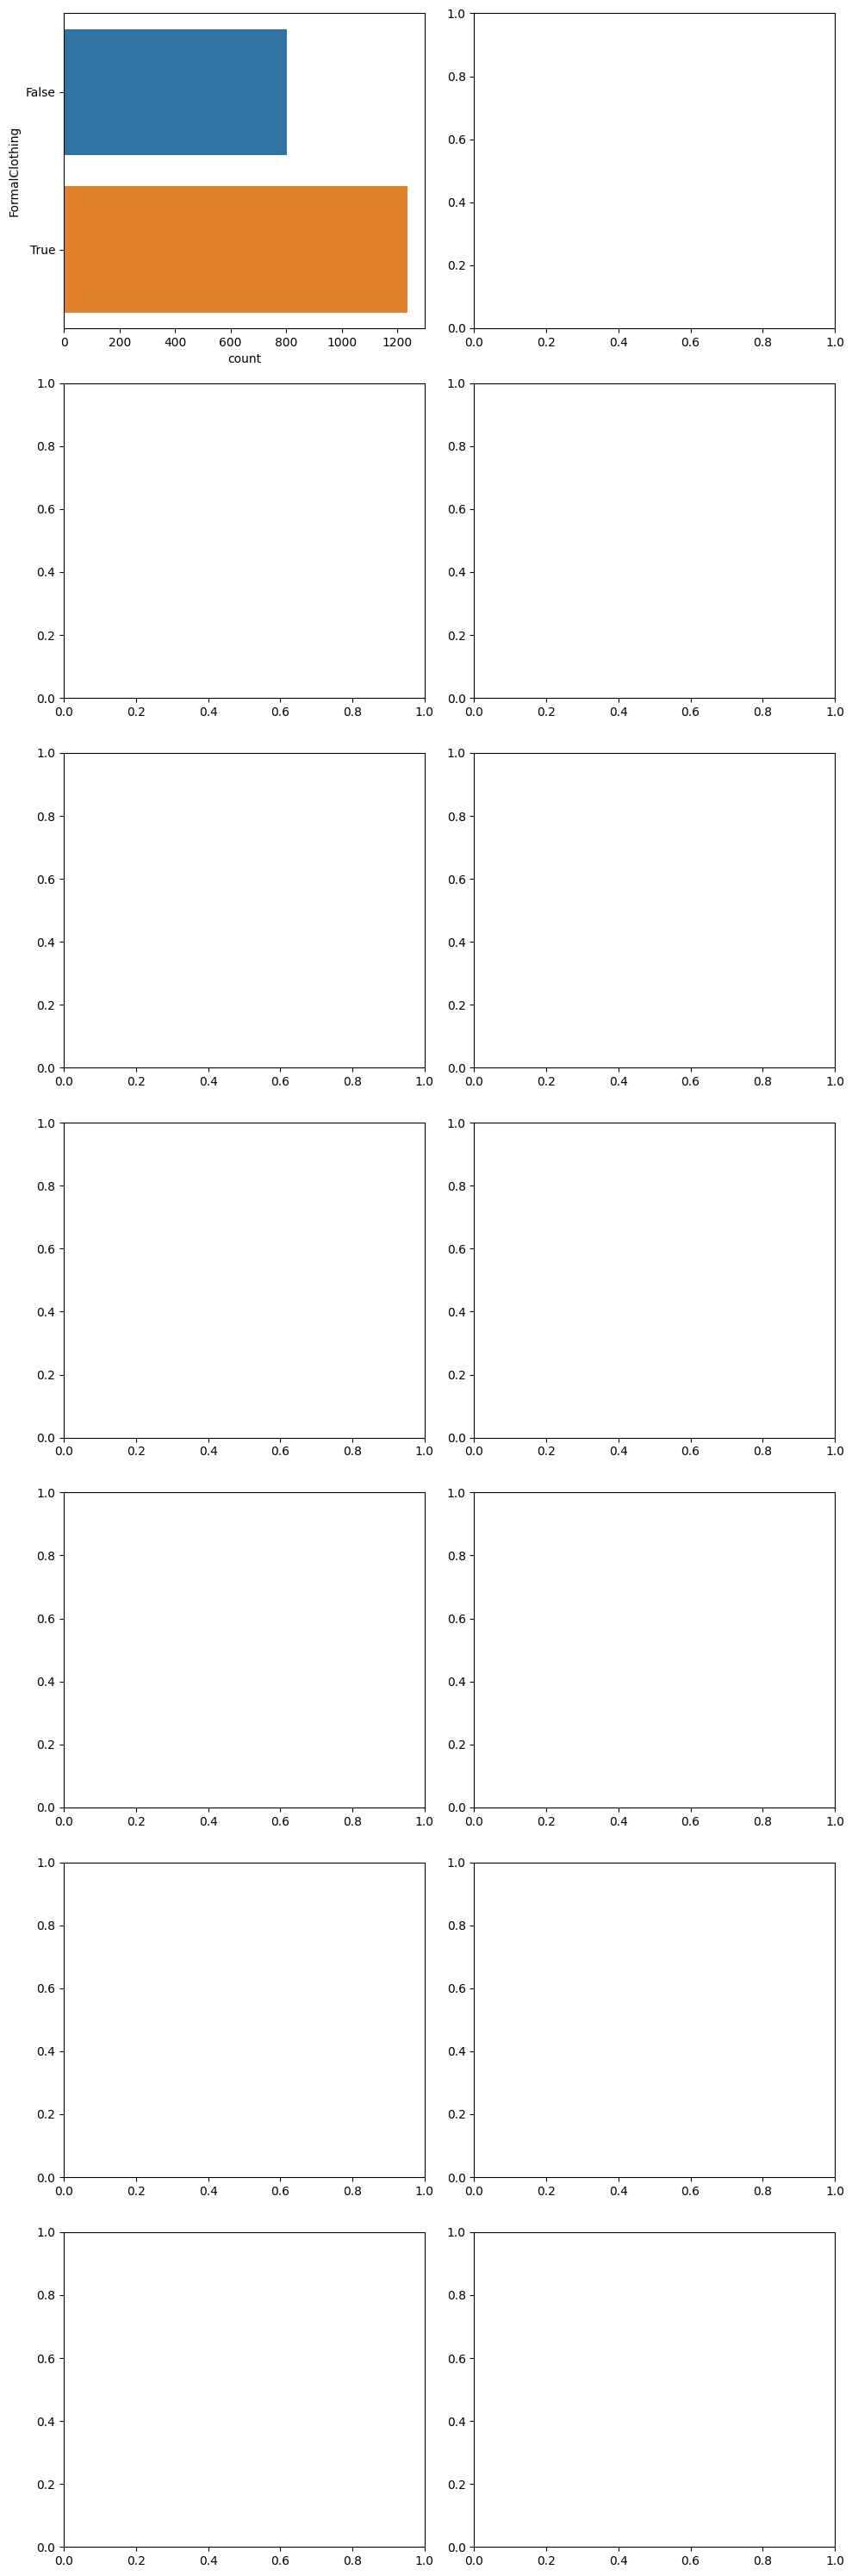

In [13]:
# create a new dataframe with columns containing only the categorical features
bool_features = winter_data.select_dtypes(include='bool').copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 30))
plt.subplots_adjust(right=1.5, top=1.25)

for i in range(len(bool_features.columns)):
    plt.subplot(7, 2, i+1)
    sns.countplot(y=bool_features.columns[i], data=bool_features)
    
plt.tight_layout()
plt.show()

In [14]:
tsl_target_data = winter_data.copy()

## Machine Learning Models (CatBoost)

In [15]:
import catboost as cat
# Classification metrics 
from sklearn.metrics import precision_score, cohen_kappa_score, f1_score, accuracy_score, recall_score
# Helper for cross-validation
from sklearn.model_selection import StratifiedKFold

In [16]:
def oof_trainer(X: pd.DataFrame,
                y,
            n_folds = None,
            params: dict = None,
            del_cols: list = None,
            cat_features=None):
    
    """This function trains multiple Catboost model while performing stratified CV with shuffling.
    out-of-fold (oof) predictions are evaluated at each fold and printed out 
    at the end of the routine as a list. The mean scores on all fold is also printed out.
    
    The metrics used for evaluation are precision_auc and the cohen's kappa
    
    Output: 
    models -- a list of models trained on each fold during CV
    oof_pred -- prediction array consisting of predictions coming from different models
    """
        
    # collect models and scores from each fold
    models = []
    f1_scores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    scores = []
    # CV splitter
    folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=505) #GroupKFold(n_splits=n_folds) 
    #features to use
    columns = [col for col in X.columns.values if not col in del_cols]
    # dimension of the target 
    n_target=1
    
    # collect out-of-sample predictions
    data_X, data_y, oof_pred = pd.DataFrame(), pd.Series(), np.zeros((len(X),n_target))


    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
     
        print('Fold {} started at {}'.format(fold_n + 1,time.ctime()))
        #print((train_index, valid_index))
        X_train, X_valid = X.iloc[train_index][columns], X.iloc[valid_index][columns]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
        data_X = data_X.append(X_valid)
        data_y = data_y.append(y_valid)
        print(data_X.shape)
        
        #Eval set preparation
        eval_set = [(X_train, y_train)]
       # eval_names = ['train']
        eval_set.append((X_valid, y_valid))
       # eval_names.append('valid')
    
        model = cat.CatBoostClassifier()
        model.fit(X=X_train, y=y_train, 
                       eval_set=eval_set, 
                       verbose=500, early_stopping_rounds=150,
                      cat_features=cat_features, use_best_model=True, plot=True)
        
        oof_pred[valid_index] = model.predict(X_valid).reshape(-1, n_target)
        models.append(model)
    
        print('-'*30)
        
        scores.append(cohen_kappa_score(y_valid, oof_pred[valid_index], weights='quadratic'))
        f1_scores.append(f1_score(y_valid, oof_pred[valid_index],   average=None))
        accuracy_scores.append(accuracy_score(y_valid, oof_pred[valid_index]))
        precision_scores.append(precision_score(y_valid, oof_pred[valid_index],   average=None))
        recall_scores.append(recall_score(y_valid, oof_pred[valid_index],   average=None))

    print(f'catb fold kappa scores: {scores}')
    print(f'catb fold kappa scores mean: {np.mean(scores)}')
    print(f'catb fold f1 scores: {f1_scores}')
    print(f'catb fold f1 scores mean: {np.mean(f1_scores)}')
    print(f'catb fold precision-micro scores: {precision_scores}')
    print(f'catb fold precision-micro scores mean: {np.mean(precision_scores)}')
    print(f'catb fold recall-micro scores: {recall_scores}')
    print(f'catb fold recall-micro scores mean: {np.mean(recall_scores)}')
    print(f'catb fold accuracy scores: {accuracy_scores}')
    print(f'catb fold accuracy scores mean: {np.mean(accuracy_scores)}')
   
    return models, oof_pred


In [17]:
tsl_target_data.columns

Index(['DAY', 'School', 'SchoolType', 'StartTime', 'AvgMaxDailyTemp',
       'AvgMinDailyTemp', 'AvgIndoorRelativeHumidity',
       'IndoorTempDuringSurvey', 'Grade', 'Age', 'Gender', 'FormalClothing',
       'TotalCLOwithChair', 'SwC', 'TSV', 'TPV', 'TCV', 'TSL', 'MC'],
      dtype='object')

# Target: TSL

In [18]:
# feature selection for Catboost
models, oof_pred = oof_trainer(X=tsl_target_data,
                    y=tsl_target_data.TSL,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TPV','TCV', 'TSL'],
                    cat_features=cat_features.drop(columns=['TSV',
       'TPV','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Mon Jul 10 12:51:41 2023
(408, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5072826	test: 1.5072826	test1: 1.5097920	best: 1.5097920 (0)	total: 71.6ms	remaining: 1m 11s


Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.02405308
bestIteration = 128

Shrink model to first 129 iterations.
------------------------------
Fold 2 started at Mon Jul 10 12:51:45 2023
(816, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5107554	test: 1.5100938	test1: 1.5157448	best: 1.5157448 (0)	total: 19.4ms	remaining: 19.4s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.007865077
bestIteration = 83

Shrink model to first 84 iterations.
------------------------------
Fold 3 started at Mon Jul 10 12:51:49 2023
(1224, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5121100	test: 1.5112166	test1: 1.5131156	best: 1.5131156 (0)	total: 18.5ms	remaining: 18.5s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.013753625
bestIteration = 90

Shrink model to first 91 iterations.
------------------------------
Fold 4 started at Mon Jul 10 12:51:53 2023
(1631, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109038
0:	learn: 1.5098577	test: 1.5082018	test1: 1.5086176	best: 1.5086176 (0)	total: 13.5ms	remaining: 13.5s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.01887323
bestIteration = 76

Shrink model to first 77 iterations.
------------------------------
Fold 5 started at Mon Jul 10 12:51:56 2023
(2038, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109038
0:	learn: 1.5118823	test: 1.5117573	test1: 1.5183548	best: 1.5183548 (0)	total: 14.7ms	remaining: 14.7s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.026869583
bestIteration = 89

Shrink model to first 90 iterations.
------------------------------
catb fold kappa scores: [0.057017186609106374, 0.03497960246506393, 0.093810275293705, 0.06494617009220627, 0.028827297054476286]
catb fold kappa scores mean: 0.05591610630291157
catb fold f1 scores: [array([0.        , 0.        , 0.02702703, 0.71612903, 0.10714286]), array([0.        , 0.        , 0.02816901, 0.72063492, 0.03809524]), array([0.        , 0.        , 0.12345679, 0.7218543 , 0.16528926]), array([0.        , 0.        , 0.05714286, 0.72580645, 0.14035088]), array([0.        , 0.        , 0.07894737, 0.70860927, 0.14516129])]
catb fold f1 scores mean: 0.18015266225662938
catb fold precision-micro scores: [array([0.        , 0.        , 0.2       , 0.56923077, 0.46153846]), arr

## Feature importance

In [19]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,School,19.998160
1,Grade,11.800103
2,StartTime,9.542289
3,DAY,8.015753
4,TotalCLOwithChair,6.116632
5,AvgMinDailyTemp,5.808420
6,AvgIndoorRelativeHumidity,5.705465
7,Gender,5.312033
8,Age,5.269012
9,SwC,5.025933


# Target: TPV

In [20]:
# feature selection for Catboost
# Remove all rows with TPV value -1
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TPV != -1],
                    y=tsl_target_data[tsl_target_data.TPV != -1].TPV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Mon Jul 10 12:52:00 2023
(406, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0729293	test: 1.0728918	test1: 1.0775001	best: 1.0775001 (0)	total: 8.35ms	remaining: 8.34s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9427944145
bestIteration = 101

Shrink model to first 102 iterations.
------------------------------
Fold 2 started at Mon Jul 10 12:52:02 2023
(812, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0739089	test: 1.0738210	test1: 1.0753535	best: 1.0753535 (0)	total: 8.42ms	remaining: 8.41s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9266242668
bestIteration = 141

Shrink model to first 142 iterations.
------------------------------
Fold 3 started at Mon Jul 10 12:52:04 2023
(1218, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0738153	test: 1.0737679	test1: 1.0759797	best: 1.0759797 (0)	total: 6.8ms	remaining: 6.79s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9326691302
bestIteration = 75

Shrink model to first 76 iterations.
------------------------------
Fold 4 started at Mon Jul 10 12:52:06 2023
(1624, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0720036	test: 1.0720675	test1: 1.0763663	best: 1.0763663 (0)	total: 7.05ms	remaining: 7.04s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9454244007
bestIteration = 141

Shrink model to first 142 iterations.
------------------------------
Fold 5 started at Mon Jul 10 12:52:08 2023
(2029, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109028
0:	learn: 1.0742956	test: 1.0739474	test1: 1.0746554	best: 1.0746554 (0)	total: 7.29ms	remaining: 7.29s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9208621455
bestIteration = 137

Shrink model to first 138 iterations.
------------------------------
catb fold kappa scores: [0.1867528066758506, 0.21980289820395105, 0.21392708299150076, 0.1170033797608403, 0.26686325101363806]
catb fold kappa scores mean: 0.20086988372915612
catb fold f1 scores: [array([0.52571429, 0.55860349, 0.19672131]), array([0.60309278, 0.54293629, 0.0952381 ]), array([0.54545455, 0.54679803, 0.07407407]), array([0.52486188, 0.5535248 , 0.14925373]), array([0.57464789, 0.53865337, 0.03703704])]
catb fold f1 scores mean: 0.4044407739531379
catb fold precision-micro scores: [array([0.51977401, 0.50678733, 0.75      ]), array([0.54672897, 0.53846154, 0.3       ]), array([0.53932584, 0.49115044, 1.        ]), array([0.50531915, 0.52216749, 0.33333333]), array([0.560

In [21]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Grade,10.956935
1,School,10.853359
2,SwC,8.460011
3,TotalCLOwithChair,8.438712
4,StartTime,8.303472
5,DAY,8.128397
6,AvgIndoorRelativeHumidity,8.041712
7,AvgMaxDailyTemp,6.447507
8,AvgMinDailyTemp,6.427601
9,IndoorTempDuringSurvey,5.742568


# Target: TSV

In [68]:
cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist()

['DAY', 'School', 'SchoolType', 'StartTime', 'Grade', 'Gender', 'SwC', 'MC']

In [64]:
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TSV != 2],
                    y=tsl_target_data[tsl_target_data.TSV != 2].TSV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Mon Jul 10 13:06:36 2023
(408, 16)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109035
0:	learn: 1.2765799	test: 1.2765799	test1: 1.2773045	best: 1.2773045 (0)	total: 14.7ms	remaining: 14.7s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7707619572
bestIteration = 189

Shrink model to first 190 iterations.
------------------------------
Fold 2 started at Mon Jul 10 13:06:40 2023
(816, 16)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109035
0:	learn: 1.2826210	test: 1.2826312	test1: 1.2871060	best: 1.2871060 (0)	total: 11.8ms	remaining: 11.8s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8366526905
bestIteration = 66

Shrink model to first 67 iterations.
------------------------------
Fold 3 started at Mon Jul 10 13:06:42 2023
(1223, 16)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2832266	test: 1.2833104	test1: 1.2894693	best: 1.2894693 (0)	total: 11.9ms	remaining: 11.9s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8175086642
bestIteration = 124

Shrink model to first 125 iterations.
------------------------------
Fold 4 started at Mon Jul 10 13:06:45 2023
(1630, 16)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2813820	test: 1.2813820	test1: 1.2833882	best: 1.2833882 (0)	total: 10.1ms	remaining: 10s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8118899596
bestIteration = 98

Shrink model to first 99 iterations.
------------------------------
Fold 5 started at Mon Jul 10 13:06:48 2023
(2037, 16)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2866891	test: 1.2866891	test1: 1.2862991	best: 1.2862991 (0)	total: 10.1ms	remaining: 10.1s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7725808097
bestIteration = 108

Shrink model to first 109 iterations.
------------------------------
catb fold kappa scores: [0.09229420885862605, 0.042872531418312265, 0.0894854586129753, 0.045990551862581275, 0.11755736103500036]
catb fold kappa scores mean: 0.07764002235749905
catb fold f1 scores: [array([0.0952381 , 0.23529412, 0.80870918, 0.125     ]), array([0.        , 0.13953488, 0.80182927, 0.        ]), array([0.        , 0.15503876, 0.8006135 , 0.        ]), array([0.        , 0.1459854 , 0.79256966, 0.        ]), array([0.        , 0.25185185, 0.81790123, 0.        ])]
catb fold f1 scores mean: 0.25847829722911303
catb fold precision-micro scores: [array([1.        , 0.53333333, 0.69892473, 0.2       ]), array([0.        , 0.39130435, 0.68311688, 0.        ]), array([0.     

In [23]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,TotalCLOwithChair,13.345440
1,School,12.587605
2,StartTime,10.889114
3,SwC,9.734356
4,Grade,8.030019
5,AvgIndoorRelativeHumidity,6.598697
6,DAY,6.537014
7,Age,5.637582
8,Gender,5.313421
9,IndoorTempDuringSurvey,4.850136


# Target: TCV

In [24]:
class_ = []
for row in tsl_target_data['TCV']:
    if row > -1:
        class_.append(1)
    else:
        class_.append(0)

In [25]:
tsl_target_data['class'] = class_ 

In [26]:
tsl_target_data['FormalClothing'] = tsl_target_data['FormalClothing'].astype(int)

In [27]:
tsl_target_data

,DAY,School,SchoolType,StartTime,AvgMaxDailyTemp,AvgMinDailyTemp,AvgIndoorRelativeHumidity,IndoorTempDuringSurvey,Grade,Age,Gender,FormalClothing,TotalCLOwithChair,SwC,TSV,TPV,TCV,TSL,MC,class
Sno,,,,,,,,,,,,,,,,,,,,
1,1,1,0,3,22.2,5.1,55.1,14.5,3,8,0,0,1.57,1,-1,2,2,1,2,1
2,1,1,0,3,22.2,5.1,55.1,14.5,3,8,0,0,1.21,1,-1,2,3,1,2,1
3,1,1,0,3,22.2,5.1,55.1,14.5,3,8,0,0,1.21,2,0,1,2,3,4,1
4,1,1,0,3,22.2,5.1,55.1,14.5,3,10,0,0,1.43,2,0,0,2,2,4,1
5,1,1,0,3,22.2,5.1,55.1,14.5,3,9,0,0,1.21,2,0,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,2,5,1,3,20.6,4.6,52.4,14.9,5,11,1,0,1.43,2,0,0,2,2,4,1
2035,2,5,1,3,20.6,4.6,52.4,14.9,5,10,1,0,1.29,2,0,0,2,2,4,1
2036,2,5,1,3,20.6,4.6,52.4,14.9,5,10,0,0,1.43,2,0,1,3,2,4,1


In [28]:
models, oof_pred = oof_trainer(X=tsl_target_data.loc[:, tsl_target_data.columns != 'class'],
                    y=tsl_target_data['class'],
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Mon Jul 10 12:52:29 2023
(408, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.035754
0:	learn: 0.6183242	test: 0.6183242	test1: 0.6172994	best: 0.6172994 (0)	total: 10.4ms	remaining: 10.4s


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.07166004531
bestIteration = 174

Shrink model to first 175 iterations.
------------------------------
Fold 2 started at Mon Jul 10 12:52:32 2023
(816, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.035754
0:	learn: 0.6242657	test: 0.6242657	test1: 0.6254584	best: 0.6254584 (0)	total: 8.99ms	remaining: 8.98s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.06991458018
bestIteration = 262

Shrink model to first 263 iterations.
------------------------------
Fold 3 started at Mon Jul 10 12:52:35 2023
(1224, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.035754
0:	learn: 0.6245395	test: 0.6245395	test1: 0.6263032	best: 0.6263032 (0)	total: 9.57ms	remaining: 9.56s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.07438790622
bestIteration = 76

Shrink model to first 77 iterations.
------------------------------
Fold 4 started at Mon Jul 10 12:52:36 2023
(1631, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.035759
0:	learn: 0.6173694	test: 0.6173694	test1: 0.6175864	best: 0.6175864 (0)	total: 9.51ms	remaining: 9.51s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.06271627112
bestIteration = 266

Shrink model to first 267 iterations.
------------------------------
Fold 5 started at Mon Jul 10 12:52:39 2023
(2038, 15)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.035759
0:	learn: 0.6191231	test: 0.6191231	test1: 0.6188847	best: 0.6188847 (0)	total: 9.09ms	remaining: 9.08s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.06955634346
bestIteration = 247

Shrink model to first 248 iterations.
------------------------------
catb fold kappa scores: [0.0, -0.00421940928270037, 0.0, 0.0, 0.0]
catb fold kappa scores mean: -0.0008438818565400741
catb fold f1 scores: [array([0.        , 0.99259259]), array([0.        , 0.99134734]), array([0.        , 0.99259259]), array([0.        , 0.99381953]), array([0.        , 0.99257426])]
catb fold f1 scores mean: 0.4962926315293251
catb fold precision-micro scores: [array([0.        , 0.98529412]), array([0.        , 0.98525799]), array([0.        , 0.98529412]), array([0.        , 0.98771499]), array([0.        , 0.98525799])]
catb fold precision-micro scores mean: 0.4928819193525076
catb fold recall-micro scores: [array([0., 1.]), array([0.        , 0.99751244]), arra

In [52]:
best_gb_model = models[0]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,AvgIndoorRelativeHumidity,14.240128
1,TotalCLOwithChair,13.756163
2,IndoorTempDuringSurvey,10.691961
3,Age,8.929140
4,MC,7.072053
5,Gender,6.844575
6,AvgMaxDailyTemp,6.066000
7,School,5.879751
8,AvgMinDailyTemp,5.571575
9,SchoolType,5.543010


In [30]:
d = tsl_target_data.drop(['TPV','TSV','TSL','class'], axis=1)

In [31]:
d['FormalClothing'] = d['FormalClothing'].astype(int)

In [32]:
d

,DAY,School,SchoolType,StartTime,AvgMaxDailyTemp,AvgMinDailyTemp,AvgIndoorRelativeHumidity,IndoorTempDuringSurvey,Grade,Age,Gender,FormalClothing,TotalCLOwithChair,SwC,TCV,MC
Sno,,,,,,,,,,,,,,,,
1,1,1,0,3,22.2,5.1,55.1,14.5,3,8,0,0,1.57,1,2,2
2,1,1,0,3,22.2,5.1,55.1,14.5,3,8,0,0,1.21,1,3,2
3,1,1,0,3,22.2,5.1,55.1,14.5,3,8,0,0,1.21,2,2,4
4,1,1,0,3,22.2,5.1,55.1,14.5,3,10,0,0,1.43,2,2,4
5,1,1,0,3,22.2,5.1,55.1,14.5,3,9,0,0,1.21,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,2,5,1,3,20.6,4.6,52.4,14.9,5,11,1,0,1.43,2,2,4
2035,2,5,1,3,20.6,4.6,52.4,14.9,5,10,1,0,1.29,2,2,4
2036,2,5,1,3,20.6,4.6,52.4,14.9,5,10,0,0,1.43,2,3,4


In [33]:
try_d = tsl_target_data.drop(['TPV','TSV','TCV','TSL', 'class'], axis=1)

In [34]:
print(try_d.iloc[0])

DAY                           1.00
School                        1.00
SchoolType                    0.00
StartTime                     3.00
AvgMaxDailyTemp              22.20
AvgMinDailyTemp               5.10
AvgIndoorRelativeHumidity    55.10
IndoorTempDuringSurvey       14.50
Grade                         3.00
Age                           8.00
Gender                        0.00
FormalClothing                0.00
TotalCLOwithChair             1.57
SwC                           1.00
MC                            2.00
Name: 1, dtype: float64


In [70]:
print(best_gb_model.predict([1,1,0,3,22.2,5,55.1,14.5,3,8,0,0,1.57,1,2]))

1


In [71]:
dice_df = dice_ml.Data(dataframe=d, continuous_features=['AvgMaxDailyTemp',
       'AvgMinDailyTemp', 'AvgIndoorRelativeHumidity',
       'IndoorTempDuringSurvey','Age',
       'TotalCLOwithChair'], outcome_name='TCV')

In [72]:
backend = 'sklearn'
m = dice_ml.Model(model=best_gb_model, backend=backend, model_type='classifier')

In [73]:
exp_random = dice_ml.Dice(dice_df, m, method='random')

In [39]:
query_instance = try_d.loc[:1]

In [40]:
query_instance['FormalClothing'] = query_instance['FormalClothing'].astype(int)

In [41]:
q = query_instance.to_json()

In [42]:
q

'{"DAY":{"1":1},"School":{"1":1},"SchoolType":{"1":0},"StartTime":{"1":3},"AvgMaxDailyTemp":{"1":22.2},"AvgMinDailyTemp":{"1":5.1},"AvgIndoorRelativeHumidity":{"1":55.1},"IndoorTempDuringSurvey":{"1":14.5},"Grade":{"1":3},"Age":{"1":8},"Gender":{"1":0},"FormalClothing":{"1":0},"TotalCLOwithChair":{"1":1.57},"SwC":{"1":1},"MC":{"1":2}}'

In [77]:
dice_exp_random = exp_random.generate_counterfactuals(pd.DataFrame({'DAY':1,'School':1,"SchoolType":0,"StartTime":3,"AvgMaxDailyTemp":22.4,"AvgMinDailyTemp":5,"AvgIndoorRelativeHumidity":55,"IndoorTempDuringSurvey":14,"Grade":3,"Age":8,"Gender":0,"FormalClothing":0,"TotalCLOwithChair":1,"SwC":1,"MC":2}, index=[0]), total_CFs=2, desired_class=0, verbose=False)

  0%|          | 0/1 [00:00<?, ?it/s]


CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=0]=1.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.